In [1]:
from datetime import date, timedelta
import requests
from requests_ntlm import HttpNtlmAuth
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline  

Download newest data from ECDC website. This uses the current date from your computer.

In [2]:
today = date.today() - timedelta(days=1)
ecdcUrl = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx' %today)
fname = 'ecdc.xlsx'

r = requests.get(ecdcUrl, auth=HttpNtlmAuth(':',':'))

with open(fname, 'wb') as f:
    f.write(r.content)

In [3]:
totalData = pd.read_excel(fname)
#totalData.tail()

Select countries to compare. Command or ctrl select different countries.

In [4]:
countries = totalData['Countries and territories'].unique()
countrySelector = widgets.SelectMultiple(
    options=countries,
    description='',
    rows=15,
)
countrySelector

SelectMultiple(options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua_and_Barbuda', 'Arge…

In [7]:
analyzedCountries = countrySelector.value
print(analyzedCountries)
df = totalData[totalData['Countries and territories'].isin(analyzedCountries)]
dfNewCases = pd.pivot_table(df, index='DateRep', columns = 'Countries and territories', values='Cases').reset_index()
dfDeaths = pd.pivot_table(df, index='DateRep', columns = 'Countries and territories', values='Deaths').reset_index()

dfNewCases.tail()

('Brazil', 'China', 'Germany', 'Italy')


Countries and territories,DateRep,Brazil,China,Germany,Italy
78,2020-03-18,57.0,33.0,1144.0,3526.0
79,2020-03-19,137.0,75.0,1042.0,4207.0
80,2020-03-20,193.0,99.0,5940.0,5322.0
81,2020-03-21,283.0,79.0,4049.0,5986.0
82,2020-03-22,224.0,83.0,3276.0,6557.0


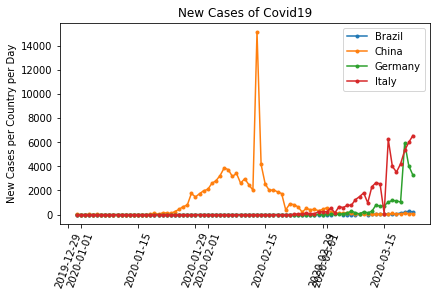

In [8]:
fig, ax = plt.subplots(constrained_layout=True)

for country in analyzedCountries:
    a = ax.plot(dfNewCases.DateRep, dfNewCases[country], '.-')
    
ax.set_ylabel('New Cases per Country per Day')
ax.set_title('New Cases of Covid19')
ax.legend()

plt.xticks(rotation=70)
plt.show()